In [2]:
import pandas as pd
import mplfinance as mpf
import numpy as np
from pandas_datareader import data as web
import yfinance as yf
yf.pdr_override()

In [3]:
start = '2020-01-01'
end = '2021-01-01'

In [4]:
data = web.get_data_yahoo('SPY', start=start, end=end)

[*********************100%***********************]  1 of 1 completed


In [7]:
def macd_func(df,a=12,b=21,c=9):
  EMA_short = df['Close'].ewm(span=a, adjust=False,min_periods= a+1).mean()
  EMA_long = df['Close'].ewm(span=b, adjust=False,min_periods= b+1).mean()
  MACD = EMA_short - EMA_long
  signal = MACD.ewm(span=c, adjust=False,min_periods=c+1).mean()
  df['macd'] = MACD
  df['signal_line'] = signal
  df['histogram'] = df['macd'] - df['signal_line']
  
  #find entry point
  df['shift_hist'] = df['histogram'].shift(1)
  df[(df['histogram'] > 0) & (df['shift_hist'] < 0)]
  #Check up trend & divergent triggered (less than 0 to be greater than 0)
  df.loc[(df['histogram']> 0) &  (df['shift_hist'] < 0 ), 'action'] = 'buy'
  #Check down trend & divergent triggered (greater than 0 to be less than 0)
  df.loc[(df['histogram']< 0) &  (df['shift_hist'] > 0 ), 'action'] = 'sell'
  df.loc[df['action'] == 'buy', 'marker_position'] = df['Low'] *0.98
  df.loc[df['action'] == 'sell', 'marker_position'] = df['High'] *1.02

  return df

In [10]:
df = data.copy()
b = macd_func(df)
b[b.action.notnull()]

,Open,High,Low,Close,Adj Close,Volume,macd,signal_line,histogram,shift_hist,action,marker_position
Date,,,,,,,,,,,,
2020-02-24,323.140015,333.559998,321.239990,322.420013,312.345734,161088400,0.925739,1.633662,-0.707923,0.060585,sell,340.231198
2020-03-26,249.520004,262.799988,249.050003,261.200012,254.526596,257632800,-13.156456,-14.091890,0.935434,-0.809117,buy,244.069003
2020-05-06,288.040009,288.459991,283.779999,284.250000,276.987640,73632600,3.145868,3.182742,-0.036874,0.213989,sell,294.229191
2020-05-08,291.089996,292.950012,289.859985,292.440002,284.968384,76452400,3.351975,3.206179,0.145796,-0.052049,buy,284.062786
2020-05-12,293.790009,294.239990,286.519989,286.670013,279.345825,95870800,3.178855,3.245981,-0.067126,0.226335,sell,300.124790
2020-05-20,295.820007,297.869995,295.570007,296.929993,289.343689,85861700,2.911819,2.740352,0.171466,-0.117700,buy,289.658607
2020-06-11,311.459991,312.149994,300.010010,300.609985,292.929657,209243600,5.164025,5.384826,-0.220800,0.998376,sell,318.392994
2020-07-07,315.380005,317.519989,313.369995,313.779999,307.108734,82910000,1.597598,1.538257,0.059341,-0.040502,buy,307.102595
2020-07-27,321.630005,323.410004,320.769989,323.220001,316.347961,48293000,2.805880,2.812373,-0.006492,0.100345,sell,329.878204


In [11]:
def macd_plot(df_plot):
  
  df = macd_func(df_plot)
  #for plot MACD
  mpf_macd = mpf.make_addplot(df['macd'],panel = 1,color = 'blue', title ='MACD')
  mpf_signal = mpf.make_addplot(df['signal_line'],panel = 1,color = 'orange')

  colors = ['green' if value >= 0 else 'red' for value in df["histogram"]]
  mpf_histogram = mpf.make_addplot(df['histogram'],type='bar',panel = 1,color = colors)

  #for marker
  markers = ['^' if x == 'buy' else 'v' for x in df['action']] 
  color_marker = ['green' if x == 'buy' else 'red' for x in df['action']]
  plot_signal = mpf.make_addplot(df['marker_position'],type='scatter',markersize= 30, marker=markers,color=color_marker)

  plots = [mpf_macd, mpf_signal, mpf_histogram,plot_signal]

  return plots

In [13]:
df = data.copy()
a = macd_plot(df)

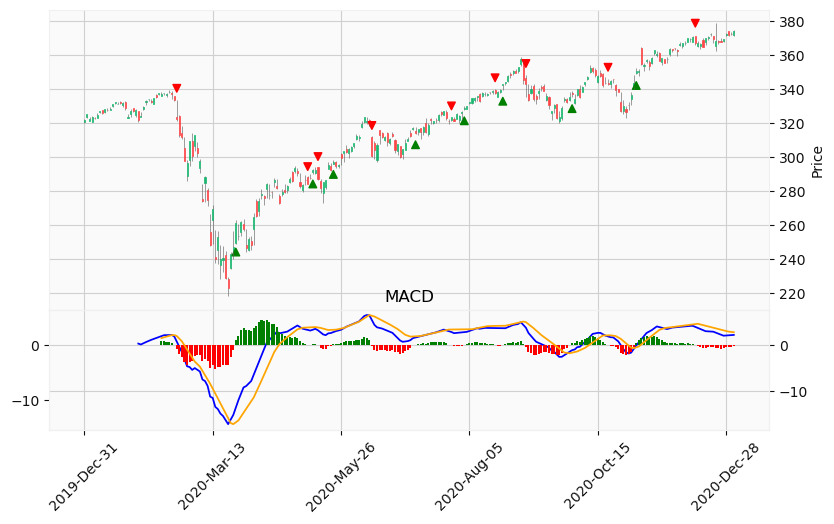

In [15]:
mpf.plot(df,type='candle', style='yahoo',addplot=a,figsize=(10,6))

In [17]:
test = data.copy()
test.head()

,Open,High,Low,Close,Adj Close,Volume,macd,signal_line,histogram,shift_hist,action,marker_position
Date,,,,,,,,,,,,
2019-12-31,320.529999,322.130005,320.149994,321.859985,311.803253,57077300,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,323.540009,324.890015,322.529999,324.869995,314.719208,59151200,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,321.160004,323.640015,321.100006,322.410004,312.336060,77709700,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-06,320.489990,323.730011,320.359985,323.640015,313.527618,55653900,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-07,323.019989,323.540009,322.239990,322.730011,312.646088,40496400,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
test['action_price'] = test['Open'].shift(-1)

In [19]:
test_record = test[test.action.notnull()]
test_record['return'] = test_record['action_price'].pct_change(1)
test_record.head(5)

C:\Users\gunsr\AppData\Local\Temp\ipykernel_23476\3031545057.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_record['return'] = test_record['action_price'].pct_change(1)


,Open,High,Low,Close,Adj Close,Volume,macd,signal_line,histogram,shift_hist,action,marker_position,action_price,return
Date,,,,,,,,,,,,,,
2020-02-24,323.140015,333.559998,321.239990,322.420013,312.345734,161088400,0.925739,1.633662,-0.707923,0.060585,sell,340.231198,323.940002,NaN
2020-03-26,249.520004,262.799988,249.050003,261.200012,254.526596,257632800,-13.156456,-14.091890,0.935434,-0.809117,buy,244.069003,253.270004,-0.218158
2020-05-06,288.040009,288.459991,283.779999,284.250000,276.987640,73632600,3.145868,3.182742,-0.036874,0.213989,sell,294.229191,287.750000,0.136139
2020-05-08,291.089996,292.950012,289.859985,292.440002,284.968384,76452400,3.351975,3.206179,0.145796,-0.052049,buy,284.062786,290.339996,0.009001
2020-05-12,293.790009,294.239990,286.519989,286.670013,279.345825,95870800,3.178855,3.245981,-0.067126,0.226335,sell,300.124790,286.059998,-0.014741


In [20]:
test_record.reset_index(inplace=True)
test_record.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'macd',
       'signal_line', 'histogram', 'shift_hist', 'action', 'marker_position',
       'action_price', 'return'],
      dtype='object')

In [21]:
test_record['previous_signal_date'] = test_record['Date'].shift(1)
test_record['previous_action'] = test_record['action'].shift(1)
test_record['previous_action_price'] = test_record['action_price'].shift(1)
test_record.rename(columns={'Date':'today_signal_date'},inplace=True)

test_record.head(5)

C:\Users\gunsr\AppData\Local\Temp\ipykernel_23476\3326636632.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_record['previous_signal_date'] = test_record['Date'].shift(1)
C:\Users\gunsr\AppData\Local\Temp\ipykernel_23476\3326636632.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_record['previous_action'] = test_record['action'].shift(1)
C:\Users\gunsr\AppData\Local\Temp\ipykernel_23476\3326636632.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

,today_signal_date,Open,High,Low,Close,Adj Close,Volume,macd,signal_line,histogram,shift_hist,action,marker_position,action_price,return,previous_signal_date,previous_action,previous_action_price
0,2020-02-24,323.140015,333.559998,321.239990,322.420013,312.345734,161088400,0.925739,1.633662,-0.707923,0.060585,sell,340.231198,323.940002,NaN,NaT,NaN,NaN
1,2020-03-26,249.520004,262.799988,249.050003,261.200012,254.526596,257632800,-13.156456,-14.091890,0.935434,-0.809117,buy,244.069003,253.270004,-0.218158,2020-02-24,sell,323.940002
2,2020-05-06,288.040009,288.459991,283.779999,284.250000,276.987640,73632600,3.145868,3.182742,-0.036874,0.213989,sell,294.229191,287.750000,0.136139,2020-03-26,buy,253.270004
3,2020-05-08,291.089996,292.950012,289.859985,292.440002,284.968384,76452400,3.351975,3.206179,0.145796,-0.052049,buy,284.062786,290.339996,0.009001,2020-05-06,sell,287.750000
4,2020-05-12,293.790009,294.239990,286.519989,286.670013,279.345825,95870800,3.178855,3.245981,-0.067126,0.226335,sell,300.124790,286.059998,-0.014741,2020-05-08,buy,290.339996


In [25]:
test_record = test_record[['action','today_signal_date','action_price','return','previous_signal_date','previous_action','previous_action_price']]
test_record

,action,today_signal_date,action_price,return,previous_signal_date,previous_action,previous_action_price
0,sell,2020-02-24,323.940002,NaN,NaT,NaN,NaN
1,buy,2020-03-26,253.270004,-0.218158,2020-02-24,sell,323.940002
2,sell,2020-05-06,287.750000,0.136139,2020-03-26,buy,253.270004
3,buy,2020-05-08,290.339996,0.009001,2020-05-06,sell,287.750000
4,sell,2020-05-12,286.059998,-0.014741,2020-05-08,buy,290.339996
5,buy,2020-05-20,296.790009,0.037510,2020-05-12,sell,286.059998
6,sell,2020-06-11,308.239990,0.038579,2020-05-20,buy,296.790009
7,buy,2020-07-07,314.609985,0.020666,2020-06-11,sell,308.239990
8,sell,2020-07-27,322.429993,0.024856,2020-07-07,buy,314.609985
9,buy,2020-08-03,327.859985,0.016841,2020-07-27,sell,322.429993


In [24]:
profit = test_record[test_record.action == 'sell']
profit

,action,today_signal_date,action_price,return,previous_signal_date,previous_action,previous_action_price
0,sell,2020-02-24,323.940002,NaN,NaT,NaN,NaN
2,sell,2020-05-06,287.750000,0.136139,2020-03-26,buy,253.270004
4,sell,2020-05-12,286.059998,-0.014741,2020-05-08,buy,290.339996
6,sell,2020-06-11,308.239990,0.038579,2020-05-20,buy,296.790009
8,sell,2020-07-27,322.429993,0.024856,2020-07-07,buy,314.609985
10,sell,2020-08-19,335.359985,0.022876,2020-08-03,buy,327.859985
12,sell,2020-09-04,336.709991,-0.019853,2020-08-24,buy,343.529999
14,sell,2020-10-21,342.959991,0.033946,2020-10-01,buy,331.700012
16,sell,2020-12-09,365.369995,0.044123,2020-11-05,buy,349.929993


<AxesSubplot:>

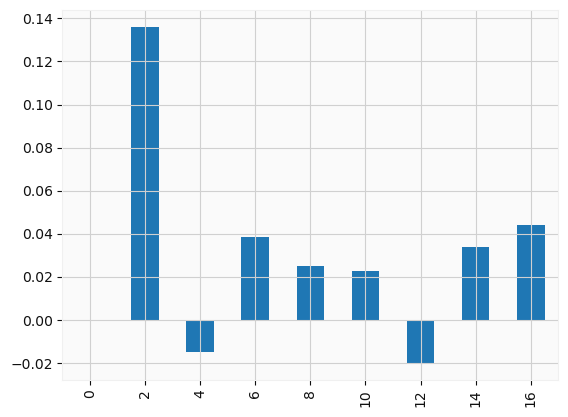

In [26]:
profit['return'].plot(kind='bar')

In [41]:
def strategy_return(df,action_price='Open',long_or_short='long'):
    
  action_df = df.loc[df['action'].notnull()]

  if action_price == 'Open':

    df['action_price'] = df['Open'].shift(-1)
    action_df['return'] = action_df['action_price'].pct_change()

  
  elif action_price == 'Close':
    df['action_price'] = df['Close']
    action_df['return'] = action_df['action_price'].pct_change()


  elif action_price == 'Adj Close':
    df['action_price'] = df['Adj Close']
    action_df['return'] = action_df['Adj Close'].pct_change()

  else:
    raise ValueError('Not correct action price, choose between {Open, Close, Adj Close}')

  record_df = action_df[['action','action_price','return']]
  record_df.reset_index(inplace=True)
  record_df['previous_signal_date'] = record_df['Date'].shift(1)
  record_df['previous_action'] = record_df['action'].shift(1)
  record_df['previous_action_price'] = record_df['action_price'].shift(1)
  record_df.rename(columns={'Date':'signal_date'},inplace=True)

  if long_or_short == 'long':
    
    summary_df = record_df[record_df.action == 'sell']
    print('long strategy')

  elif long_or_short == 'short':    
    
    summary_df = record_df[record_df.action == 'buy']
    summary_df['return'] = summary_df['return'] * -1
    print('short strategy')

  else:
    raise ValueError('Not correct long_or_short, choose between {long,short}')  

  return action_df, record_df, summary_df

In [45]:
df = data.copy()
starter = macd_func(df)
starter

,Open,High,Low,Close,Adj Close,Volume,macd,signal_line,histogram,shift_hist,action,marker_position
Date,,,,,,,,,,,,
2019-12-31,320.529999,322.130005,320.149994,321.859985,311.803253,57077300,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,323.540009,324.890015,322.529999,324.869995,314.719208,59151200,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,321.160004,323.640015,321.100006,322.410004,312.336060,77709700,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-06,320.489990,323.730011,320.359985,323.640015,313.527618,55653900,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-07,323.019989,323.540009,322.239990,322.730011,312.646088,40496400,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,368.079987,369.029999,367.450012,369.000000,364.145996,26457900,2.010105,2.630371,-0.620266,-0.664406,NaN,NaN
2020-12-28,371.739990,372.589996,371.070007,372.170013,367.274323,39000400,2.096176,2.523532,-0.427356,-0.620266,NaN,NaN
2020-12-29,373.809998,374.000000,370.829987,371.459991,366.573639,53680500,2.088380,2.436502,-0.348122,-0.427356,NaN,NaN


In [49]:
a,b,c = strategy_return(starter,action_price='Close',long_or_short='short')

short strategy


C:\Users\gunsr\AppData\Local\Temp\ipykernel_23476\1705302035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  action_df['return'] = action_df['action_price'].pct_change()
C:\Users\gunsr\AppData\Local\Temp\ipykernel_23476\1705302035.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  record_df['previous_signal_date'] = record_df['Date'].shift(1)
C:\Users\gunsr\AppData\Local\Temp\ipykernel_23476\1705302035.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


In [50]:
c

,signal_date,action,action_price,return,previous_signal_date,previous_action,previous_action_price
1,2020-03-26,buy,261.200012,0.189877,2020-02-24,sell,322.420013
3,2020-05-08,buy,292.440002,-0.028813,2020-05-06,sell,284.250000
5,2020-05-20,buy,296.929993,-0.035790,2020-05-12,sell,286.670013
7,2020-07-07,buy,313.779999,-0.043811,2020-06-11,sell,300.609985
9,2020-08-03,buy,328.790009,-0.017233,2020-07-27,sell,323.220001
11,2020-08-24,buy,342.920013,-0.016873,2020-08-19,sell,337.230011
13,2020-10-01,buy,337.040009,0.016143,2020-09-04,sell,342.570007
15,2020-11-05,buy,350.239990,-0.021912,2020-10-21,sell,342.730011


<AxesSubplot:>

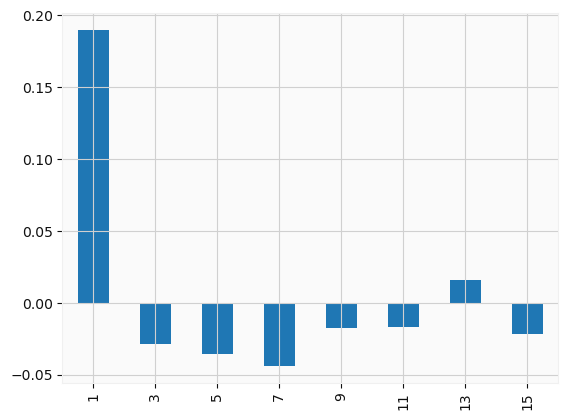

In [51]:
c['return'].plot(kind='bar')

In [55]:
#AVG Expected Return
c['return'].mean()

0.005198441080462066